## 1. Importing Libraries

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Informasi mengenai dataset:
- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage

- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## 2. Loading Dataset

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

## 3. Exploratory Data Analysis

In [3]:
df.info() #melihat informasi mengenai dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe() #melihat summary dari dataframe disini

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

Dengan informasi tersebut, dapat melakukan analisa mengenai standard missing value dari dataframe. Tidak ada standard missing value dalam dataframe ini dikarenakan semuanya memiliki jumlah kolom yang sama yaitu 1000

In [5]:
timestamp = [] #membuat list kosong untuk timestamp
for i in df['Time']: #melakukan looping for repetition
    timestamp.append(i[0:2:]) #melakukan repetition dalam slicing timestamp
df['Hour'] = timestamp

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.date #mengubah dari tipe object menjadi date
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time #mengubah dari tipe object menjadi time

Saya membuat kolom baru yaitu 'Hour' untuk mengambil Jam ke berapa transaksi tersebut dilakukan

Lalu, saya membagi dua buah dataframe yaitu untuk object dan untuk numerical value untuk membantu dalam melakukan distribution plotting dari masing-masing kolom

In [7]:
df_numeric = df.select_dtypes(include='number')
df_object = df.select_dtypes(include='object')

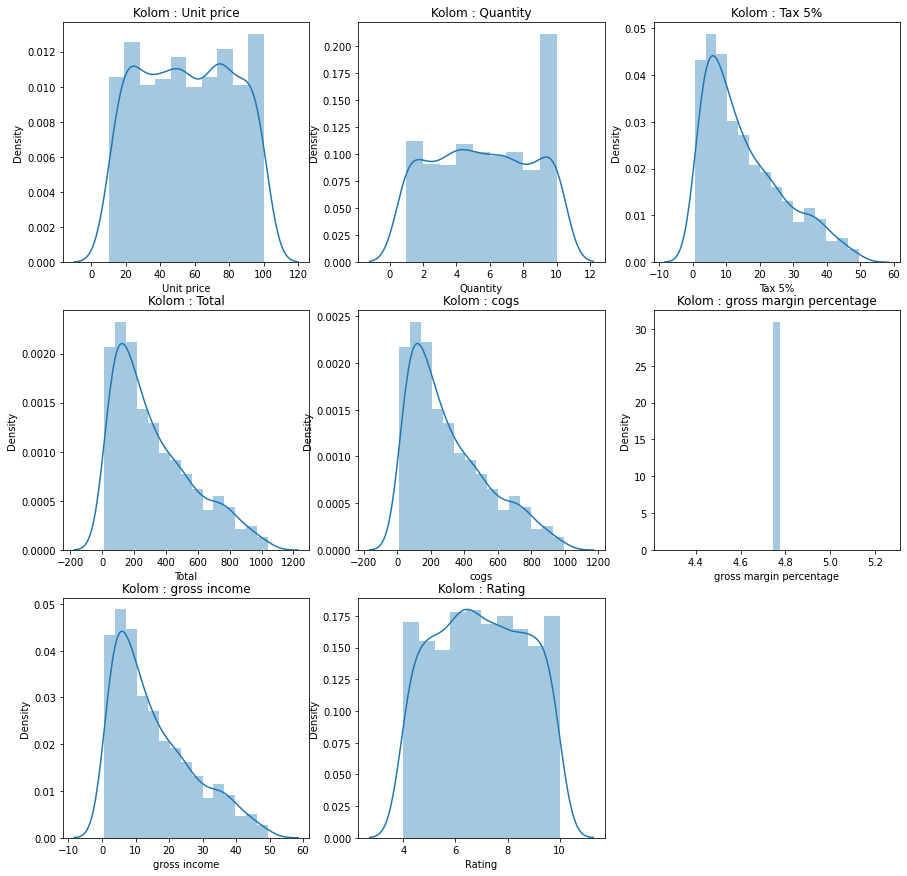

In [8]:
fig = plt.figure(figsize=(15,15)) #penentuan panjang dan lebar figure plot
kolom = 3 #penentuan kolom dalam melakukan plotting
baris = 3 #penentuan baris dalam melakukan plotting
list_number = np.array(df_numeric.columns)
for i in range (8):
    fig.add_subplot(baris, kolom, i+1)
    plt.title("Kolom : "+list_number[i])
    sns.distplot(df_numeric[list_number[i]])

dari graph di atas, gross margin percentage membuat saya ingin melihat lebih dalam mengenai value dari kolom tersebut. Dikarenakan ketika saya melihat ringkasan dari kolom tersebut juga sudah sangat janggal. Memiliki nilai mean, median dan modus yang sama. serta nilai standar deviasi nya 0  (df.describe())

In [9]:
df_numeric['gross margin percentage'].describe()

count    1000.000000
mean        4.761905
std         0.000000
min         4.761905
25%         4.761905
50%         4.761905
75%         4.761905
max         4.761905
Name: gross margin percentage, dtype: float64

In [10]:
df_numeric['gross margin percentage'].unique()

array([4.76190476])

Dan ternyata, nilai unique dari kolom 'gross margin percentage' hanya ada 1 value yaitu di angka 4.76. Selanjutnya saya akan melihat apabila dataset ini memiliki outlier dengan menggunakan boxplot

## 5. Data Cleaning

In [11]:
plot = df_numeric.drop('gross margin percentage', axis=1) #membuang kolom gross margin percentage dalam
#melakukan plotting karena hanya memiliki 1 value

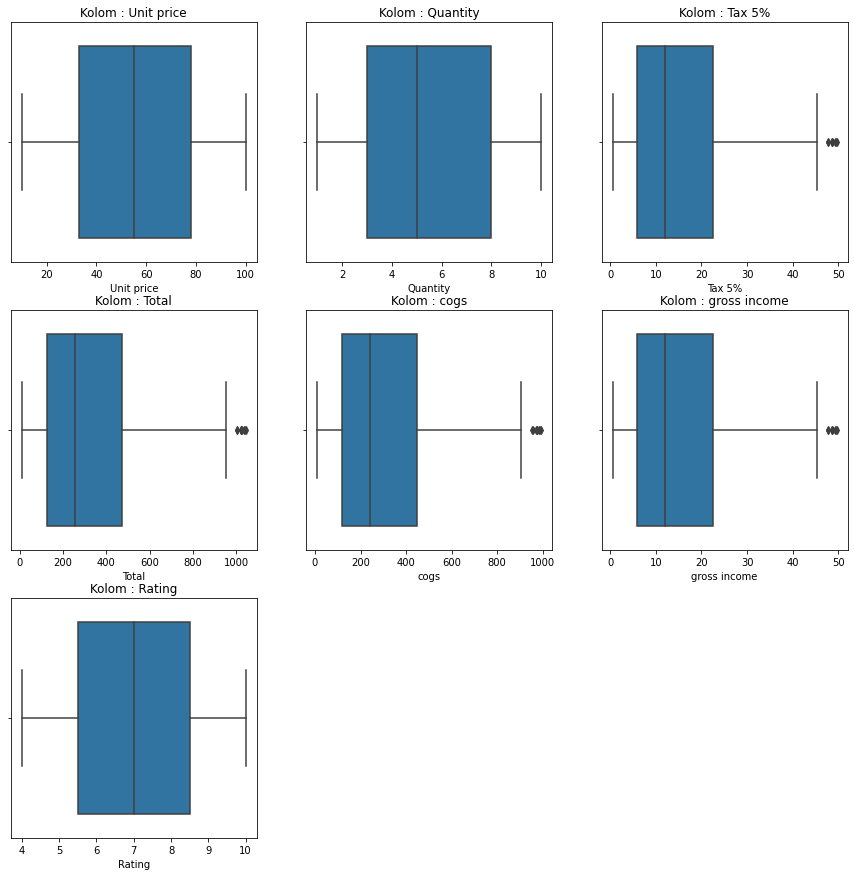

In [12]:
fig = plt.figure(figsize=(15,15)) #penentuan panjang dan lebar figure plot
kolom = 3 #penentuan kolom dalam melakukan plotting
baris = 3 #penentuan baris dalam melakukan plotting
list_number = np.array(plot.columns)
for i in range (7):
    fig.add_subplot(baris, kolom, i+1)
    plt.title("Kolom : "+list_number[i])
    sns.boxplot(plot[list_number[i]])

Dari boxplot di atas, ada beberapa outlier yang di tangkap oleh boxplot tersebut dalam kolom 
- 'Tax %'
- 'Total'
- 'cogs'
- 'gross income'

Saya akan melakukan handling outlier ini menggunakan metode IQR dengan threshold 1,5. Pertama, saya melihat nilai dari Q1, dan Q3 untuk masing-masing kolom terlebih dahulu

In [13]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unit price                  45.060000
Quantity                     5.000000
Tax 5%                      16.520375
Total                      346.927875
cogs                       330.407500
gross margin percentage      0.000000
gross income                16.520375
Rating                       3.000000
dtype: float64


Setelah saya menampung nilai Q1,Q3 dan IQR saya akan melakukan pengecekan mengenai berapa jumlah outlier yang terdeteksi oleh boxplot ini

In [14]:
threshold = 1.5
df_numeric_out = df_numeric[
    ((df_numeric < (Q1 - threshold * IQR)) |(df_numeric > (Q3 + threshold * IQR))).any(axis=1)]

print("jumlah data =", len(df))
print("jumlah outliers =",len(df_numeric_out))
print("jumlah data setelah di pangkas =",len(df)-len(df_numeric_out))

jumlah data = 1000
jumlah outliers = 9
jumlah data setelah di pangkas = 991


In [15]:
list_outlier = []
for i in range (len(df)):
    if(df.index.isin(df_numeric_out.index).astype(int)[i] == 1):
        list_outlier.append(i)
print('Index outlier = ',list_outlier)

Index outlier =  [166, 167, 350, 357, 422, 557, 699, 792, 996]


Lalu saya akan melihat data-data yang termasuk kedalam kategori outlier dari metode IQR tadi

In [16]:
df.iloc[list_outlier]

Invoice ID Branch       City Customer type  Gender         Product line  \
166  234-65-2137      C  Naypyitaw        Normal    Male   Home and lifestyle   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
357  554-42-2417      C  Naypyitaw        Normal  Female    Sports and travel   
422  271-88-8734      C  Naypyitaw        Member  Female  Fashion accessories   
557  283-26-5248      C  Naypyitaw        Member  Female   Food and beverages   
699  751-41-9720      C  Naypyitaw        Normal    Male   Home and lifestyle   
792  744-16-7898      B   Mandalay        Normal  Female   Home and lifestyle   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   

     Unit price  Quantity  Tax 5%     Total        Date      Time  \
166       95.58        10  47.790  1003.590  2019-01-16  13:32:00   
167       98.98        10  49.490  1039.290  2019-02-08  16:20:00   
350       99.30        10  49.650  1042.650  2019-02-15  14:53:00   
357       95.44        10  47.720  1002.120  2019-01-09  13:45:00   
422       97.21        10  48.605  1020.705  2019-02-08  13:00:00   
557       98.52        10  49.260  1034.460  2019-01-30  20:23:00   
699       97.50        10  48.750  1023.750  2019-01-12  16:18:00   
792       97.37        10  48.685  1022.385  2019-01-15  13:48:00   
996       97.38        10  48.690  1022.490  2019-03-02  17:16:00   

         Payment   cogs  gross margin percentage  gross income  Rating Hour  
166         Cash  955.8                 4.761905        47.790     4.8   13  
167  Credit card  989.8                 4.761905        49.490     8.7   16  
350  Credit card  993.0                 4.761905        49.650     6.6   14  
357         Cash  954.4                 4.761905        47.720     5.2   13  
422  Credit card  972.1                 4.761905        48.605     8.7   13  
557      Ewallet  985.2                 4.761905        49.260     4.5   20  
699      Ewallet  975.0                 4.761905        48.750     8.0   16  
792  Credit card  973.7                 4.761905        48.685     4.9   13  
996      Ewallet  973.8                 4.761905        48.690     4.4   17

Dapat dilihat, outlier ini adalah data konsumen yang belanja dengan jumlah yang banyak dan memiliki nilai yang sangat berbeda dari kebanyakan sample lainnya. Lalu, saya akan melakukan dropping untuk ke-9 data ini dari dataframe

In [17]:
df.drop(index=list_outlier,axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(991, 18)

Dikarenakan jumlah outlier hanya ada 9 data (0.9%) dan menurut saya itu masih berada dalam jumlah toleransi saya (5%) maka saya akan melakukan dropping untuk data tersebut

Lalu, saya akan melihat korelasi antar kolom dari bagian dataframe numerical tanpa menggunakan kolom gross margin dikarenakan hanya memiliki 1 value dan tidak mungkin memiliki korelasi antara kolom lainnya

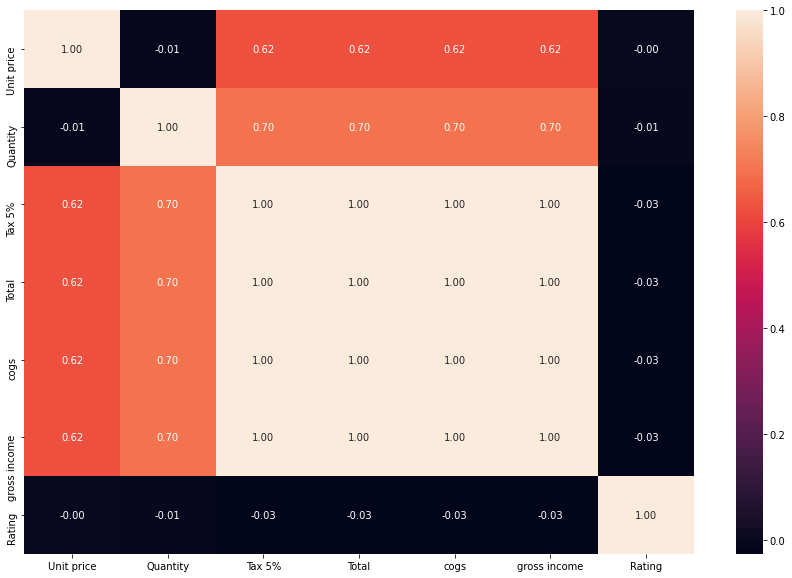

In [18]:
df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.drop('gross margin percentage',axis=1).corr(), annot=True, fmt='.2f')
plt.show()

Setelah saya melihat korelasi dari numerical dataframe tersebut, hampir semuanya berbanding secara sempurna kecuali untuk setiap korelasi rating, dan hubungan antara harga dan quantitas.
Maka dapat disimpulkan bahwa :
- Pemberian rating bukan berdasarkan dari banyaknya pembelanjaan ataupun jumlah pembelian
- Dari toko ini, quantitas pembelian tidak memandang harga

Lalu saya akan melakukan explorasi data untuk bagian tipe data object, tetapi saya ingin melihat apakah kolom 'ID' dapat saya drop terlebih dahulu

In [19]:
print('Jumlah ID dalam dataframe =',df['Invoice ID'].nunique())
print('Jumlah data dalam dataframe =',len(df))

Jumlah ID dalam dataframe = 991
Jumlah data dalam dataframe = 991


dikarenakan kolom 'ID' memiliki nilai yang unique untuk setiap data, maka saya akan melakukan dropping terlebih dahulu agar dapat saya plot lebih mudah, serta untuk date and time

In [20]:
df_object = df.select_dtypes(include='object')
plot = df_object.drop(['Invoice ID','Date','Time','Hour'], axis=1)

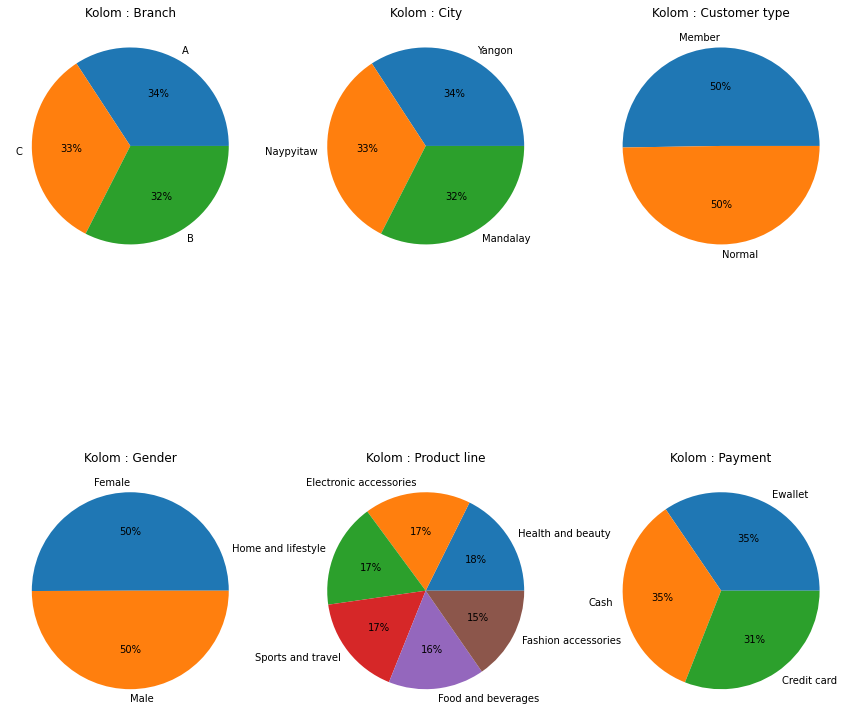

In [21]:
fig = plt.figure(figsize=(15,15)) #penentuan panjang dan lebar figure plot
kolom = 3 #nentuan kolom dalam melakukan plotting
baris = 2 #penentuan baris dalam melakukan plotting
list_object = np.array(plot.columns)
for i in range (6):
    fig.add_subplot(baris, kolom, i+1)
    plt.title("Kolom : "+list_object[i])
    plt.pie(plot[list_object[i]].value_counts(),labels = plot[list_object[i]].unique(),autopct="%.0f%%") 

Dari categorical dataframe di atas, tidak ada yang terlihat sangat mencolok atau janggal dari masing-masing kolom. Hampir terbagi samarata untuk semua nya.

## 6. Measure of Central Tendencies

Melihat Central Tendency dari masing-masing kolom yang ada didalam dataframe numerical

In [22]:
ct = pd.DataFrame()
range_number = []
ct['Column Name'] = df_numeric.columns
ct['Mean'] = np.array(df_numeric.mean()).round(2)
ct['Modus'] = np.array(df_numeric.mode())[0].round(2)
ct['Median'] = np.array(df_numeric.median()).round(2)
ct['Variance'] = np.array(df_numeric.var()).round(2)
ct['Standard Deviation'] = np.array(df_numeric.std()).round(2)
for i in df_numeric.columns:
    range_number.append(df[i].max() - df[i].min())
ct['Range'] = np.array(range_number).round(2)

Agar enak di lihat, saya membuat dataframe baru untuk menampung nilai dari masing-masing central tendency dan nilai dari measure of variance

In [23]:
ct

Column Name    Mean  Modus  Median  Variance  \
0               Unit price   55.29  83.77   54.84    692.30   
1                 Quantity    5.47   1.00    5.00      8.44   
2                   Tax 5%   15.08   4.15   12.04    128.13   
3                    Total  316.60  87.23  252.76  56505.85   
4                     cogs  301.53  83.08  240.72  51252.47   
5  gross margin percentage    4.76   4.76    4.76      0.00   
6             gross income   15.08   4.15   12.04    128.13   
7                   Rating    6.98   6.00    7.00      2.95   

   Standard Deviation   Range  
0               26.31   89.88  
1                2.91    9.00  
2               11.32   44.82  
3              237.71  941.15  
4              226.39  896.33  
5                0.00    0.00  
6               11.32   44.82  
7                1.72    6.00

Tidak ada nilai yang mencolok ataupun yang berbeda dari yang lain kecuali untuk gross margin percentage, yang memang hanya memiliki 1 value didalam kolom tersebut, lalu saya akan melihat modus untuk tipe data  object

In [24]:
df_object.drop('Invoice ID',axis=1).mode()

Branch    City Customer type Gender         Product line        Date  \
0      A  Yangon        Member   Male  Fashion accessories  2019-02-07   
1    NaN     NaN           NaN    NaN                  NaN         NaN   

       Time  Payment Hour  
0  14:42:00     Cash   19  
1  19:48:00  Ewallet  NaN

Dari hasil modus di atas, dikarenakan kolom 'Payment' memiliki jumlah value yang sama untuk bagian 'Cash' dan 'Ewallet' maka function tersebut akan melakukan menampilkan sebanyak 2 baris. Tetapi dapat disimpulkan bahwa :
- Branch paling banyak transaksi ada di branch A
- Kota paling banyak transaksi ada di kota Yangon
- Tipe Konsumen terbanyak adalah Member. (berarti, dapat di asumsikan bahwa kebanyakan konsumen tersebut adalah konsumen repetitive buyer)
- Gender ter banyak dalam melakukan transaksi adalah Laki-laki
- Payment method memiliki jumlah yang sama untuk bagian Cash dan E-Wallet dengan jumlah tertinggi

## 9. Grouping

Saya ingin melakukan observasi berdasarkan hari dalam pembelanjaan dengan cara membuat kolom baru dalam dataframe yaitu 'Day' untuk menampung hari transaksi dilakukan, dan 'DoW' untuk mencata hari ke berapa dalam satu minggu

In [25]:
hari = []
week = {0: 'Senin',1:'Selasa',2:'Rabu',3:'Kamis',4:'Jumat',5:'Sabtu',6:'Minggu'}
for i in range (len(df)):
    hari.append(df['Date'][i].weekday()) 
nama_hari = []
for i in hari:
    nama_hari.append(week[i])
df['Day'] = nama_hari
df['DoW'] = hari

### Berdasarkan kota

In [26]:
yangon = df[df['City'] == 'Yangon']
naypyitaw = df[df['City'] == 'Naypyitaw']
mandalay = df[df['City'] == 'Mandalay']

In [57]:
def plot_jp(data,payment=0,mem=0): #plotting jenis produk
    if mem == 1:
        pl = data['Product line'][data['Customer type'] == 'Member'] #Untuk filtering member
    elif mem == 2:
        pl = data['Product line'][data['Customer type'] == 'Normal'] #Untuk filtering normal
    else:
        pl = data['Product line'] #Kombinasi antara member dan normal
    fig = px.bar(pl,x=pl.value_counts().index,y=pl.value_counts(),width=850,height=400,
                 color=pl.unique(),title='Jumlah jenis produk terjual',
                 labels={
                     'x': 'Jenis Produk',
                     'y': 'Kuantitas',
                     'color': 'Jenis Produk'
                 })
    fig.show()

def plot_cogs(data,mem=0): #plotting cost of goods sales
    if mem == 1:
        pl = data['Product line'][data['Customer type'] == 'Member'] #Untuk filtering member
    elif mem == 2:
        pl = data['Product line'][data['Customer type'] == 'Normal']#Untuk filtering normal
    else:
        pl = data['Product line'] #kombinasi normal dan member
    total = data.groupby(['Product line'])['Total'].sum().sort_values(ascending=False)
    fig = px.bar(x=total.index,y=total, title='Jumlah pendapatan per jenis produk',
                color=pl.unique(),width=850,height=400,
                 labels={
                     'x': 'Jenis Produk',
                     'y': 'Jumlah Pengeluaran',
                     'color': 'Jenis Produk'
                 }) 
    fig.show()

In [54]:
df.groupby(['Product line'])['Total'].sum().sort_values(ascending=False)

Product line
Food and beverages        55110.3840
Electronic accessories    54337.5315
Sports and travel         54120.7065
Fashion accessories       51203.2500
Home and lifestyle        49789.6980
Health and beauty         49193.7390
Name: Total, dtype: float64

Code di atas adalah untuk melakukan pembuatan function untuk mempermudah apabila ingin melakukan plotting graph. Dengan parameter tergantung pada 'City' dan 'customer type' yang ingin di visualisasikan.(default value untuk customer type adalah kombinasi antara normal dan member, mem=1 untuk member, mem=0 untuk normal)<br>Function di atas untuk:
- plot_jp : untuk melakukan visualisasi dengan x-axis untuk Jenis Produk, dan y-axis untuk Kuantitas Jenis produk
- plot_cogs : untuk melakukan visualisasi dengan x axis untuk Jenis Produk, dan y-axis untuk Jumlah pengeluaran dana terhadap jenis produk tersebut

In [72]:
plot_cogs(yangon,2)

In [58]:
plot_jp(yangon)

### Melihat buying behaviour berdasarkan hari

In [30]:
yangon = df[df['City'] == 'Yangon']
naypyitaw = df[df['City'] == 'Naypyitaw']
mandalay = df[df['City'] == 'Mandalay']

In [63]:
def daily_qty(data,product_line=df['Product line'].unique()): #pembuatan function plotting daily transaction
    data = df[df['City'] == data]
    daily = data[data['Product line'].isin(product_line)]
    daily = daily.groupby(["Product line", "Day","DoW"]).size().reset_index(name="qty")
    daily.sort_values(by='DoW', inplace=True)
    fig = px.bar(daily,x='Day', y="qty",
             width=850,height=400,title='Jumlah jenis produk terjual',color='Product line',
                labels={'qty':'Kuantitas'})
    fig.show()

def daily_cogs(data,product_line=df['Product line'].unique()): #pembuatan function plotting daily transaction
    data = df[df['City'] == data]
    daily = data[data['Product line'].isin(product_line)]
    daily = daily.groupby(["Product line", "Day","DoW"])['Total'].sum().reset_index() #membuat df baru
    daily.sort_values(by='DoW', inplace=True)#sortir berdasarkan hari
    fig = px.bar(daily,x='Day', y="Total",
             width=850,height=400,title='Jumlah jenis produk terjual',color='Product line')
    fig.show()

Code di atas adalah untuk mempermudah dalam melakukan visualisasi dengan pembuatan function dengan parameter 'City'. <br>Function di atas untuk:
- daily_qty : Untuk melakukan visualisasi graph dengan x-axis = Nama hari dalam transaksi, dan y-axis = kuantitas barang terjual di hari itu. Dengan warna-warna yang melambangkan masing-masing jenis produk
- daily_cogs : Untuk melakukan visualisasi graph dengan x-axis = Nama hari dalam transaksi, dan y-axis = jumlah pengeluaran dana untuk produk pada hari itu. Dengan warna-warna yang melambangkan masing-masing jenis produk

Parameter kedua adalah untuk menampung list product line apa saja yang ingin di tampilkan (dalam bentuk list)

In [64]:
daily_qty('Mandalay',['Food and beverages','Home and lifestyle'])

In [62]:
daily_cogs('Yangon')

## Hypothesis Testing

Melakukan Hypothesis testing untuk melihat apakah ada perbedaan yang signifikan untuk buying behaviour dari Member dan Normal (Non-Member)

Apakah performa penjualan Member dan Normal (non-member) sama?

H0: $\mu$ Cost of goods sold member = $\mu$ Cost of goods sold normal

H1: $\mu$ Cost of goods sold member != $\mu$ Cost of goods sold normal

In [65]:
member = df[df['Customer type'] == 'Member'].groupby('Date').sum()
normal = df[df['Customer type'] == 'Normal'].groupby('Date').sum()

In [66]:
df['Customer type'].value_counts()

Member    498
Normal    493
Name: Customer type, dtype: int64

In [67]:
member.describe()

Unit price   Quantity      Tax 5%        Total         cogs  \
count   89.000000  89.000000   89.000000    89.000000    89.000000   
mean   313.086180  30.955056   86.209539  1810.400326  1724.190787   
std    145.373158  15.002204   47.603704   999.677794   952.074090   
min     15.370000   2.000000    1.537000    32.277000    30.740000   
25%    219.510000  21.000000   57.070500  1198.480500  1141.410000   
50%    295.260000  29.000000   76.251000  1601.271000  1525.020000   
75%    408.990000  40.000000  118.131500  2480.761500  2362.630000   
max    701.010000  72.000000  243.536000  5114.256000  4870.720000   

       gross margin percentage  gross income     Rating        DoW  
count                89.000000     89.000000  89.000000  89.000000  
mean                 26.645265     86.209539  38.846067  16.696629  
std                  11.045135     47.603704  16.315017  13.429449  
min                   4.761905      1.537000   7.200000   0.000000  
25%                  19.047619     57.070500  28.400000   6.000000  
50%                  23.809524     76.251000  37.200000  15.000000  
75%                  33.333333    118.131500  50.400000  24.000000  
max                  61.904762    243.536000  83.400000  50.000000

In [68]:
normal.describe()

Unit price    Quantity      Tax 5%        Total         cogs  \
count   89.000000   89.000000   89.000000    89.000000    89.000000   
mean   302.586292   29.943820   81.663820  1714.940225  1633.276404   
std    144.128196   15.195962   46.124955   968.624057   922.499101   
min     23.070000    3.000000    6.963000   146.223000   139.260000   
25%    210.400000   21.000000   51.055000  1072.155000  1021.100000   
50%    284.840000   28.000000   75.596500  1587.526500  1511.930000   
75%    396.790000   36.000000  104.654500  2197.744500  2093.090000   
max    803.420000  106.000000  288.007000  6048.147000  5760.140000   

       gross margin percentage  gross income      Rating        DoW  
count                89.000000     89.000000   89.000000  89.000000  
mean                 26.377742     81.663820   38.871910  17.044944  
std                  11.509816     46.124955   17.812387  14.580428  
min                   4.761905      6.963000    4.400000   0.000000  
25%                  19.047619     51.055000   27.700000   6.000000  
50%                  28.571429     75.596500   38.100000  15.000000  
75%                  33.333333    104.654500   48.800000  30.000000  
max                  71.428571    288.007000  114.200000  65.000000

In [70]:
t,p=stats.ttest_ind(member['Total'],normal['Total'])
print ("t-statistic:" + str(t))
print("p-value:" + str(p))

t-statistic:0.6469729851123673
p-value:0.5184923151622487


In [71]:
np.random.seed(42)
pop=np.random.normal(member['Total'].mean(), member['Total'].std(), 100000)
ci = stats.norm.interval(0.95, pop.mean(), pop.std())
fig = px.histogram(pop,width=850,height=400,labels={
                     'variable': 'Distribution'}
                  )
fig.add_vline(pop.mean(), line_color='yellow', line_dash='dash', line_width=2,annotation_text='Mean')
fig.add_vline(ci[0], line_color='green', line_dash='dash', line_width=2)
fig.add_vline(ci[1], line_color='green', line_dash='dash', line_width=2,annotation_text='CI')
fig.add_vline(pop.mean()+t*pop.std(), line_color='black', line_dash='dash', line_width=2,annotation_text='P-val')
fig.add_vline(pop.mean()-t*pop.std(), line_color='black', line_dash='dash', line_width=2)
fig.update_yaxes(title='y', visible=False, showticklabels=False)
fig.update_xaxes(title='x', visible=False, showticklabels=False)
fig.update_layout(showlegend=False)
fig.show()

### Kesimpulan untuk asumsi audience = Developer
Dari hasil hypothesis testing ini, saya mendapatkan t-stat senilai 0.65 dan p-value senilai 0.52. Nilai dari p-value tersebut melebihi dari nilai critical value yang sudah di tetapkan. Maka, dapat di konklusikan bahwa Null-Hypothesis (H0) gagal di tolak dikarenakan kurangnya bukti untuk menolak nya<br><br>

### Kesimpulan untuk asumsi audience = Executives
Kesimpulan yang dapat ditarik adalah, tidak ada-nya perbedaan yang signifikan antara member dan normal (non-member). Menurut saya, harus di perbanyak benefit yang diberikan kepada Member agar dapat menjadi loyal customer dalam toko dari dataset ini. Apabila tidak ada perbedaan yang signifikan antara keduanya, customer akan jauh lebih memilih untuk menjadi normal customer saja (asumsi menjadi member harus memberikan data / effort tambahan)

### Penyimpanan dataframe baru (setelah cleaning dan cell baru) ke csv

In [40]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
986  652-49-6720      C  Naypyitaw        Member  Female   
987  233-67-5758      C  Naypyitaw        Normal    Male   
988  727-02-1313      A     Yangon        Member    Male   
989  347-56-2442      A     Yangon        Normal    Male   
990  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
2        Home and lifestyle       46.33         7  16.2155  340.5255   
3         Health and beauty       58.22         8  23.2880  489.0480   
4         Sports and travel       86.31         7  30.2085  634.3785   
..                      ...         ...       ...      ...       ...   
986  Electronic accessories       60.95         1   3.0475   63.9975   
987       Health and beauty       40.35         1   2.0175   42.3675   
988      Food and beverages       31.84         1   1.5920   33.4320   
989      Home and lifestyle       65.82         1   3.2910   69.1110   
990     Fashion accessories       88.34         7  30.9190  649.2990   

           Date      Time      Payment    cogs  gross margin percentage  \
0    2019-01-05  13:08:00      Ewallet  522.83                 4.761905   
1    2019-03-08  10:29:00         Cash   76.40                 4.761905   
2    2019-03-03  13:23:00  Credit card  324.31                 4.761905   
3    2019-01-27  20:33:00      Ewallet  465.76                 4.761905   
4    2019-02-08  10:37:00      Ewallet  604.17                 4.761905   
..          ...       ...          ...     ...                      ...   
986  2019-02-18  11:40:00      Ewallet   60.95                 4.761905   
987  2019-01-29  13:46:00      Ewallet   40.35                 4.761905   
988  2019-02-09  13:22:00         Cash   31.84                 4.761905   
989  2019-02-22  15:33:00         Cash   65.82                 4.761905   
990  2019-02-18  13:28:00         Cash  618.38                 4.761905   

     gross income  Rating Hour     Day  DoW  
0         26.1415     9.1   13   Sabtu    5  
1          3.8200     9.6   10   Jumat    4  
2         16.2155     7.4   13  Minggu    6  
3         23.2880     8.4   20  Minggu    6  
4         30.2085     5.3   10   Jumat    4  
..            ...     ...  ...     ...  ...  
986        3.0475     5.9   11   Senin    0  
987        2.0175     6.2   13  Selasa    1  
988        1.5920     7.7   13   Sabtu    5  
989        3.2910     4.1   15   Jumat    4  
990       30.9190     6.6   13   Senin    0  

[991 rows x 20 columns]

In [41]:
df.to_csv('supermarket_sales_cleaned.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'supermarket_sales_cleaned.csv'